In [2]:
# Importing required libraries

import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load the data
data = pd.read_csv(r'C:\Users\spand\Projects\CAR_DHEKO\All_Cities_Cleaned.csv')
data

,City,Fuel Type,Kms Driven,Transmission,Owner Number,Brand,Price,Seats,Mileage,Engine,Max Power,Torque,Car Age
0,Bangalore,Petrol,120000,Manual,3,Maruti,400000,5,23,998,67,90,10
1,Bangalore,Petrol,32706,Manual,2,Ford,811000,5,17,1497,121,150,7
2,Bangalore,Petrol,11949,Manual,1,Tata,585000,5,23,1199,84,114,7
3,Bangalore,Petrol,17794,Manual,1,Hyundai,462000,5,19,1197,81,113,11
4,Bangalore,Diesel,60000,Manual,1,Maruti,790000,5,23,1248,88,200,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,Kolkata,Petrol,10000,Manual,1,Maruti,509999,5,25,998,65,89,3
8222,Kolkata,Petrol,120000,Manual,1,Maruti,180000,5,22,796,47,69,11
8223,Kolkata,Petrol,50000,Automatic,3,Mercedes-Benz,550000,5,11,1796,178,285,14
8224,Kolkata,Petrol,40000,Manual,1,Maruti,140000,5,18,1197,85,114,13


In [4]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_features

['City', 'Fuel Type', 'Transmission', 'Brand']

In [5]:
columns_to_encode = ['Transmission', 'Brand', 'Fuel Type', 'City']

label_encoders = {} # Dictionary to store encoders for each column

for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])  
    label_encoders[column] = le  # Store encoder for this column

In [6]:
# Feature Matrix & Target variable
y = data['Price']
X = data.drop(columns=['Price'], axis=1)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6580, 12)
(1646, 12)
(6580,)
(1646,)


In [8]:
# Scaling features that have large ranges & are on different scales using Min-Max Scaler
columns_to_scale = ['Kms Driven', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Car Age']

mm_scaler = MinMaxScaler()
X_train[columns_to_scale] = mm_scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = mm_scaler.transform(X_test[columns_to_scale])

### Building models

In [9]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predticing using the model
y_train_lr_pred = lr.predict(X_train)
y_test_lr_pred = lr.predict(X_test)

print('Predictions made on X_train data\n', y_train_lr_pred, '\n')
print('Predictions made on X_test data\n', y_test_lr_pred)

Predictions made on X_train data
 [ 415860.02052874  233751.25904779 1054624.91011691 ...  996227.16499853
  655367.2243237   582190.31649446] 

Predictions made on X_test data
 [451434.82464191 -49657.61098797 696782.6448556  ... 477677.63935839
 159469.39855216 918354.37638559]


In [11]:
# Model Evaluation
print(y_train, '\n') # actual values
print(y_train_lr_pred) # predicted values

1832    508000
1755    600000
2513    740000
5106    724000
681     900000
         ...  
5734    195000
5191    390000
5390    760000
860     375000
7270    600000
Name: Price, Length: 6580, dtype: int64 

[ 415860.02052874  233751.25904779 1054624.91011691 ...  996227.16499853
  655367.2243237   582190.31649446]


In [12]:
# mse, mae & r2 score for train data
lr_train_mse = mean_squared_error(y_train, y_train_lr_pred)
lr_train_mae = mean_absolute_error(y_train, y_train_lr_pred)
lr_train_r2 = r2_score(y_train, y_train_lr_pred)

print('MSE:',lr_train_mse)
print('MAE:',lr_train_mae)
print('R2:',lr_train_r2)

MSE: 33452924911.6364
MAE: 133941.3327864209
R2: 0.85649036918739


In [13]:
# mse, mae & r2 score for test data
lr_test_mse = mean_squared_error(y_test, y_test_lr_pred)
lr_test_mae = mean_absolute_error(y_test, y_test_lr_pred)
lr_test_r2 = r2_score(y_test, y_test_lr_pred)

print('MSE:',lr_test_mse)
print('MAE:',lr_test_mae)
print('R2:',lr_test_r2)

MSE: 36002368377.929436
MAE: 136184.0695990773
R2: 0.860823753267747


In [14]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_mae, lr_train_r2, lr_test_mse, lr_test_mae, lr_test_r2]).T
lr_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
lr_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Linear Regression,33452924911.636398,133941.332786,0.85649,36002368377.929436,136184.069599,0.860824


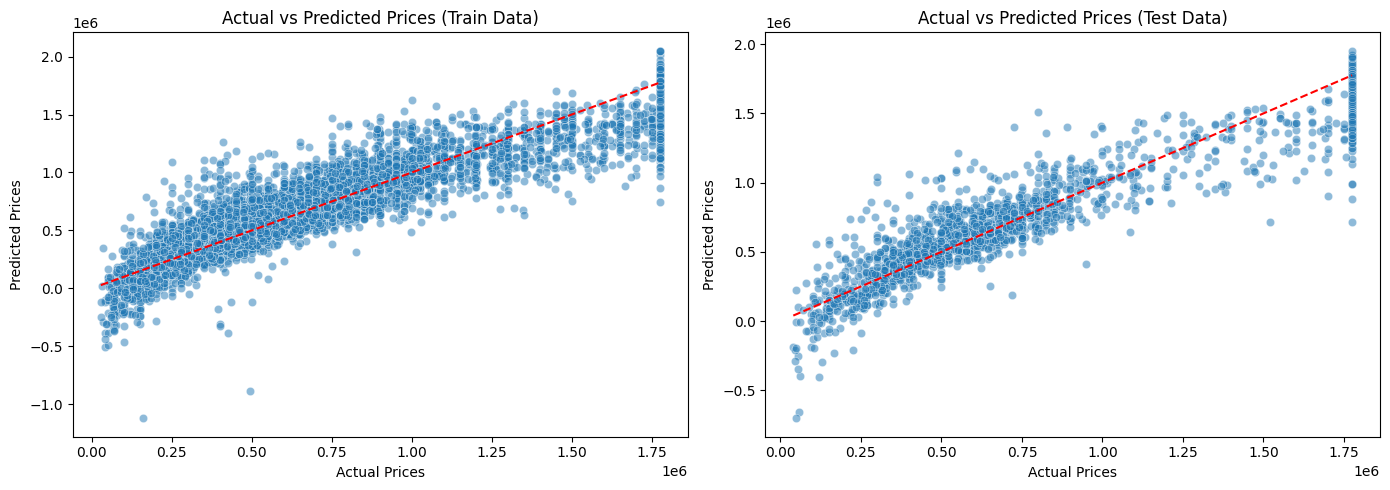

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_lr_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_lr_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  
plt.show()

In [16]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
# Predticing using the model
y_train_dt_pred = dt.predict(X_train)
y_test_dt_pred = dt.predict(X_test)

print('Predictions made on X_train data\n', y_train_dt_pred, '\n')
print('Predictions made on X_test data\n', y_test_dt_pred)

Predictions made on X_train data
 [508000. 600000. 740000. ... 760000. 375000. 600000.] 

Predictions made on X_test data
 [340000. 195000. 594000. ... 554000. 170000. 888000.]


In [18]:
# Model Evaluation
print(y_train, '\n') # actual values
print(y_train_dt_pred) # predicted values

1832    508000
1755    600000
2513    740000
5106    724000
681     900000
         ...  
5734    195000
5191    390000
5390    760000
860     375000
7270    600000
Name: Price, Length: 6580, dtype: int64 

[508000. 600000. 740000. ... 760000. 375000. 600000.]


In [19]:
# mse, mae & r2 score for train data
dt_train_mse = mean_squared_error(y_train, y_train_dt_pred)
dt_train_mae = mean_absolute_error(y_train, y_train_dt_pred)
dt_train_r2 = r2_score(y_train, y_train_dt_pred)

print('MSE:',dt_train_mse)
print('MAE:',dt_train_mae)
print('R2:',dt_train_r2)

MSE: 79194076.59589666
MAE: 778.3181357649444
R2: 0.9996602655007045


In [20]:
# mse, mae & r2 score for test data
dt_test_mse = mean_squared_error(y_test, y_test_dt_pred)
dt_test_mae = mean_absolute_error(y_test, y_test_dt_pred)
dt_test_r2 = r2_score(y_test, y_test_dt_pred)

print('MSE:',dt_test_mse)
print('MAE:',dt_test_mae)
print('R2:',dt_test_r2)

MSE: 27029514053.671997
MAE: 94565.66929931146
R2: 0.8955105875953179


In [21]:
dt_results = pd.DataFrame(['Decision Tree', dt_train_mse, dt_train_mae, dt_train_r2, dt_test_mse, dt_test_mae, dt_test_r2]).T
dt_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
dt_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Decision Tree,79194076.595897,778.318136,0.99966,27029514053.671997,94565.669299,0.895511


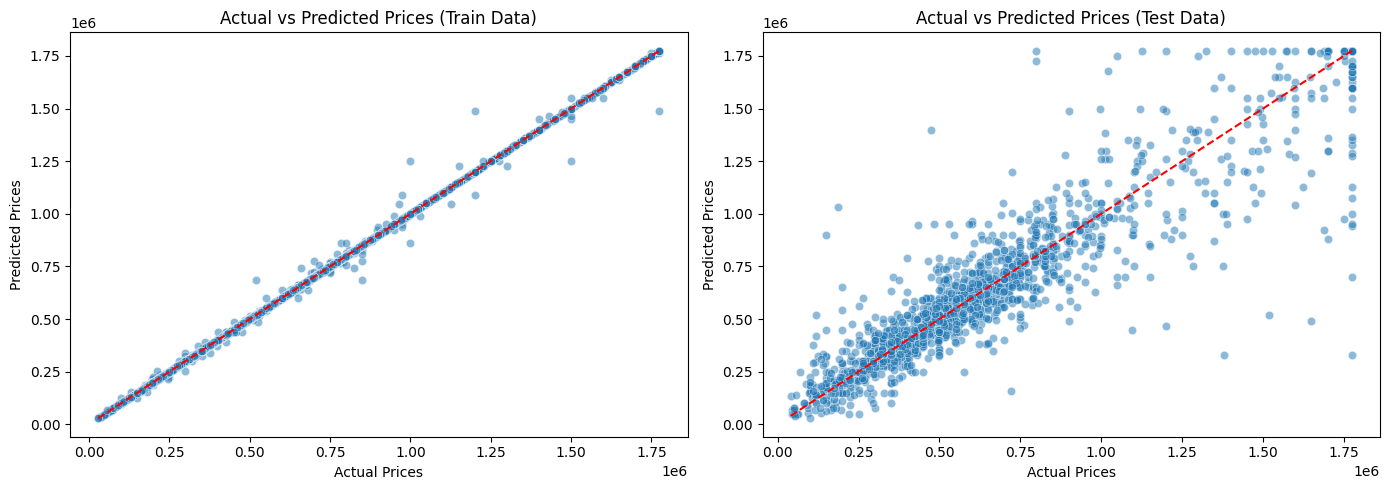

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_dt_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_dt_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  
plt.show()

In [23]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Predticing using the model
y_train_rf_pred = rf.predict(X_train)
y_test_rf_pred = rf.predict(X_test)

print('Predictions made on X_train data\n', y_train_rf_pred, '\n')
print('Predictions made on X_test data\n', y_test_rf_pred)

Predictions made on X_train data
 [489079.99 535284.99 801809.97 ... 761239.87 383145.   618570.  ] 

Predictions made on X_test data
 [417439.92 134240.01 554799.84 ... 538550.   156120.   872130.  ]


In [25]:
# Model Evaluation
print(y_train, '\n') # actual values
print(y_train_rf_pred) # predicted values

1832    508000
1755    600000
2513    740000
5106    724000
681     900000
         ...  
5734    195000
5191    390000
5390    760000
860     375000
7270    600000
Name: Price, Length: 6580, dtype: int64 

[489079.99 535284.99 801809.97 ... 761239.87 383145.   618570.  ]


In [26]:
# mse, mae & r2 score for train data
rf_train_mse = mean_squared_error(y_train, y_train_rf_pred)
rf_train_mae = mean_absolute_error(y_train, y_train_rf_pred)
rf_train_r2 = r2_score(y_train, y_train_rf_pred)

print('MSE:',rf_train_mse)
print('MAE:',rf_train_mae)
print('R2:',rf_train_r2)

MSE: 1940890920.7645614
MAE: 27369.704625441456
R2: 0.9916737762027624


In [27]:
# mse, mae & r2 score for test data
rf_test_mse = mean_squared_error(y_test, y_test_rf_pred)
rf_test_mae = mean_absolute_error(y_test, y_test_rf_pred)
rf_test_r2 = r2_score(y_test, y_test_rf_pred)

print('MSE:',rf_test_mse)
print('MAE:',rf_test_mae)
print('R2:',rf_test_r2)

MSE: 14601789210.830551
MAE: 74323.74345460859
R2: 0.9435530963794949


In [28]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_mae, rf_train_r2, rf_test_mse, rf_test_mae, rf_test_r2]).T
rf_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
rf_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Random Forest,1940890920.764561,27369.704625,0.991674,14601789210.830551,74323.743455,0.943553


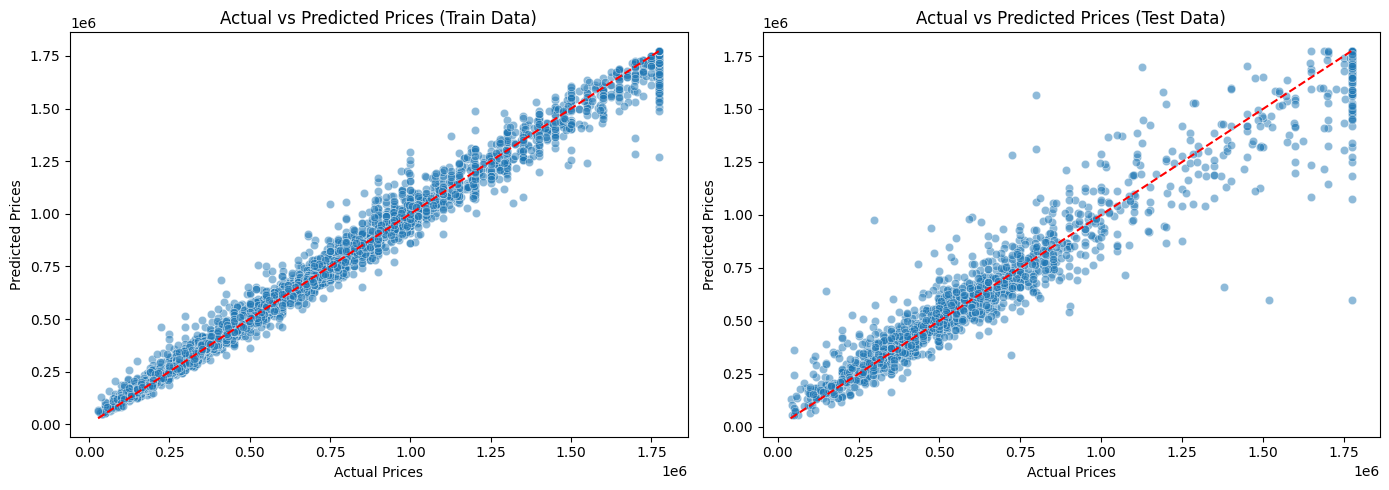

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_rf_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_rf_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout() 
plt.show()

In [30]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
# Predticing using the model
y_train_gb_pred = gb.predict(X_train)
y_test_gb_pred = gb.predict(X_test)

print('Predictions made on X_train data\n', y_train_gb_pred, '\n')
print('Predictions made on X_test data\n', y_test_gb_pred)

Predictions made on X_train data
 [428652.68889468 560186.1854363  835489.42604408 ... 820226.84133136
 427034.58422038 603009.60825778] 

Predictions made on X_test data
 [411943.96943214 132138.51225193 564682.38133353 ... 504433.89271284
 204740.72951305 908709.98318225]


In [32]:
# Model Evaluation
print(y_train, '\n') # actual values
print(y_train_gb_pred) # predicted values

1832    508000
1755    600000
2513    740000
5106    724000
681     900000
         ...  
5734    195000
5191    390000
5390    760000
860     375000
7270    600000
Name: Price, Length: 6580, dtype: int64 

[428652.68889468 560186.1854363  835489.42604408 ... 820226.84133136
 427034.58422038 603009.60825778]


In [33]:
# mse, mae & r2 score for train data
gb_train_mse = mean_squared_error(y_train, y_train_gb_pred)
gb_train_mae = mean_absolute_error(y_train, y_train_gb_pred)
gb_train_r2 = r2_score(y_train, y_train_gb_pred)

print('MSE:',gb_train_mse)
print('MAE:',gb_train_mae)
print('R2:',gb_train_r2)

MSE: 13715429743.081848
MAE: 80942.46879503579
R2: 0.9411622073685608


In [34]:
# mse, mae & r2 score for test data
gb_test_mse = mean_squared_error(y_test, y_test_gb_pred)
gb_test_mae = mean_absolute_error(y_test, y_test_gb_pred)
gb_test_r2 = r2_score(y_test, y_test_gb_pred)

print('MSE:',gb_test_mse)
print('MAE:',gb_test_mae)
print('R2:',gb_test_r2)

MSE: 17314969419.742607
MAE: 87804.48456972573
R2: 0.9330646131158189


In [35]:
gb_results = pd.DataFrame(['Gradient Boosting', gb_train_mse, gb_train_mae, gb_train_r2, gb_test_mse, gb_test_mae, gb_test_r2]).T
gb_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
gb_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Gradient Boosting,13715429743.081848,80942.468795,0.941162,17314969419.742607,87804.48457,0.933065


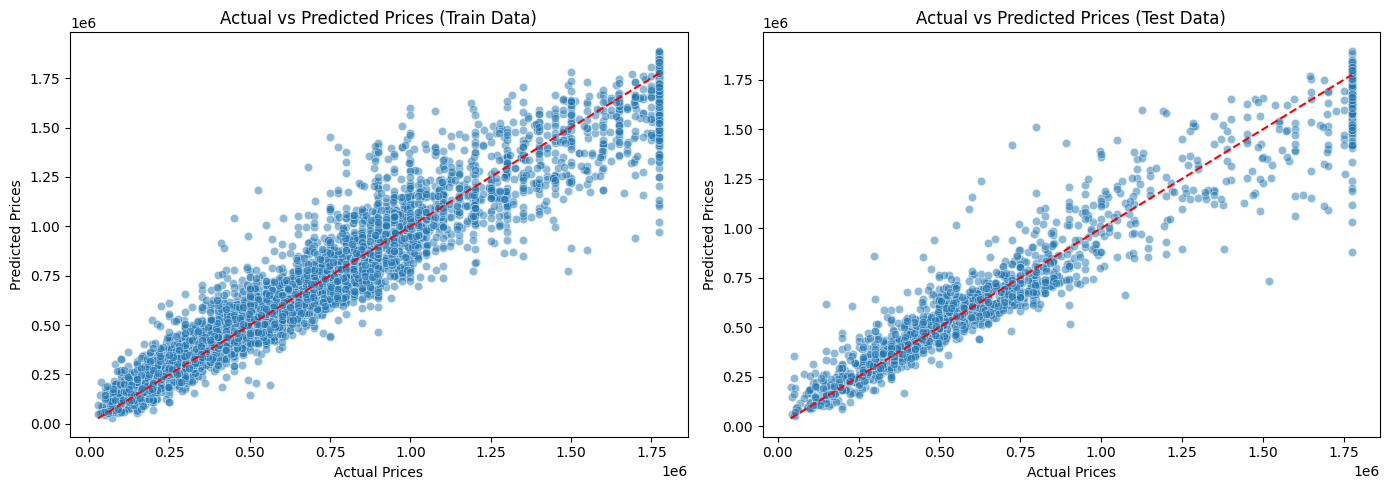

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a figure with 1 row & 2 columns

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_gb_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_gb_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Comparing Different Models

In [37]:
model_comparision = pd.concat([lr_results, dt_results, rf_results, gb_results], axis = 0).reset_index(drop=True)
model_comparision

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Linear Regression,33452924911.636398,133941.332786,0.85649,36002368377.929436,136184.069599,0.860824
1,Decision Tree,79194076.595897,778.318136,0.99966,27029514053.671997,94565.669299,0.895511
2,Random Forest,1940890920.764561,27369.704625,0.991674,14601789210.830551,74323.743455,0.943553
3,Gradient Boosting,13715429743.081848,80942.468795,0.941162,17314969419.742607,87804.48457,0.933065


#### **📌 Model-Specific Analysis**

**1️) Linear Regression**
- Training R² = 0.856  → 85.6% of variance in training data.
- Testing R² = 0.860 → Slightly better fit on test data.
- Issue → High MSE & MAE, indicates that the model doesn’t capture nonlinear relationships effectively.
- ***Inference* → Linear Regression assumes a straight-line relationship between features & target. Since the dataset is non-linear, this model struggles to capture the full complexity.**

**2️) Decision Tree**
- Training R² = 0.999 → Almost perfectly fits training data.
- Testing R² = 0.895 → Huge drop, showing overfitting.
- Issue → Overfitting Model memorized training data but fails to generalize.
- ***Inference* → Extreme overfitting on train data & poor generalization to unseen data**

**3️) Random Forest**
- Training R² = 0.991 → High but less overfit than Decision Tree
- Testing R² = 0.943 → Good but shows gap, fails to generalize
- Issue: Overfitting but much better than Decision Tree.
- ***Inference* → The testing MSE & MAE are lower than Decision Tree, meaning it makes better predictions.**

**4️) Gradient Boosting**
- Training R² = 0.941  → Lower than Random Forest (suggests less overfitting).
- Testing R² = 0.933 → Good generalization, slightly lower than Random Forest.
- Issue → High Train & Test MAE than RF indicating large error range but performance is stable.
- ***Inference* → MSE & MAE are slightly worse than Random Forest, but still better than Decision Tree & Linear Regression.**
  
### ***As we have already Hyper tuned the Random Forest model, now let's consider Gradient Boosting for further hyperparameter tuning!***

### Model Optimization

#### Feature Engineering

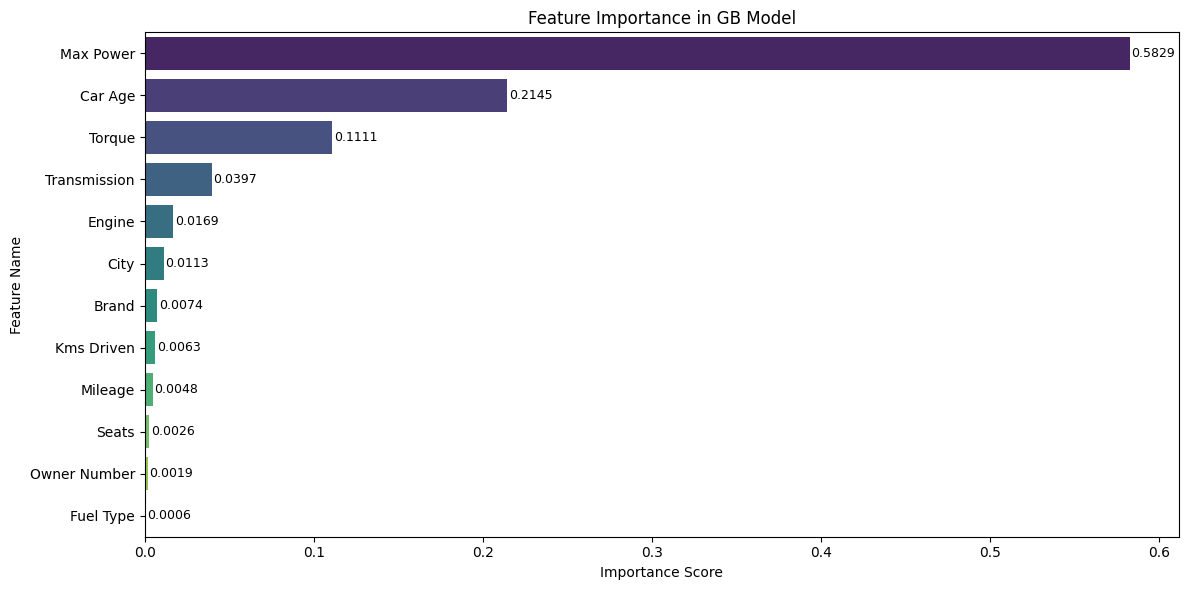

In [38]:
# Extract feature importance
feature_importance = gb.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance 
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.4f}', va='center', fontsize=9)

plt.title("Feature Importance in GB Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

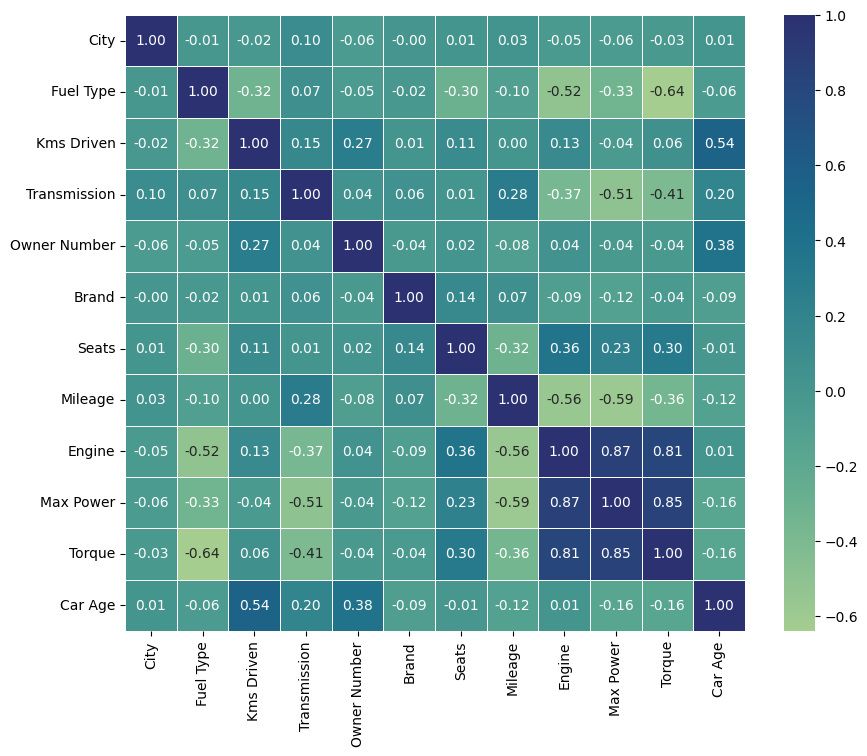

In [39]:
# Checking Multicollinearity 
corr_matrix = X_train.corr() 

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f", linewidth = 0.5)
plt.show()

In [40]:
df = data.copy()

# Create New Features
df['Age vs Performance'] = df['Car Age'] * df['Mileage'] # Older cars may have reduced efficiency
df['Fuel Efficiency'] = df['Mileage'] / df['Engine'] # Smaller engines with higher mileage are more efficient

# Dropping Fuel Type & Seats as it has low importance & Torque as it has a strong correlation with Max Power 
df.drop(columns=['Torque', 'Seats', 'Fuel Type'], inplace=True)
df

,City,Kms Driven,Transmission,Owner Number,Brand,Price,Mileage,Engine,Max Power,Car Age,Age vs Performance,Fuel Efficiency
0,0,120000,1,3,20,400000,23,998,67,10,230,0.023046
1,0,32706,1,2,6,811000,17,1497,121,7,119,0.011356
2,0,11949,1,1,29,585000,23,1199,84,7,161,0.019183
3,0,17794,1,1,9,462000,19,1197,81,11,209,0.015873
4,0,60000,1,1,20,790000,23,1248,88,10,230,0.018429
...,...,...,...,...,...,...,...,...,...,...,...,...
8221,5,10000,1,1,20,509999,25,998,65,3,75,0.025050
8222,5,120000,1,1,20,180000,22,796,47,11,242,0.027638
8223,5,50000,0,3,21,550000,11,1796,178,14,154,0.006125
8224,5,40000,1,1,20,140000,18,1197,85,13,234,0.015038


In [41]:
# Feature Matrix & Target variable
y = df['Price']
X = df.drop(columns=['Price'], axis=1)

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6580, 11)
(1646, 11)
(6580,)
(1646,)


In [43]:
# Normalizing features that have large ranges & are on different scales using Min-Max Scaler
columns_to_scale = ['Kms Driven', 'Mileage', 'Engine', 'Max Power', 'Car Age', 'Age vs Performance', 'Fuel Efficiency']

mm_scaler = MinMaxScaler()
X_train[columns_to_scale] = mm_scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = mm_scaler.transform(X_test[columns_to_scale])

In [44]:
# Gradient Boosting Regressor
gb_b = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_b.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [45]:
# Predticing using the model
y_train_gb_b_pred = gb_b.predict(X_train)
y_test_gb_b_pred = gb_b.predict(X_test)

print('Predictions made on X_train data\n', y_train_gb_b_pred, '\n')
print('Predictions made on X_test data\n', y_test_gb_b_pred)

Predictions made on X_train data
 [428639.29295054 505866.3525992  805503.35428163 ... 887445.20985591
 427655.83735489 590962.09247764] 

Predictions made on X_test data
 [416077.73035461 135519.5163178  596427.20512798 ... 527387.45886526
 217325.76016589 896262.98728754]


In [46]:
# mse, mae & r2 score for train data
gb_b_train_mse = mean_squared_error(y_train, y_train_gb_b_pred)
gb_b_train_mae = mean_absolute_error(y_train, y_train_gb_b_pred)
gb_b_train_r2 = r2_score(y_train, y_train_gb_b_pred)

print('Train MSE:',gb_b_train_mse)
print('Train MAE:',gb_b_train_mae)
print('Train R2:',gb_b_train_r2, '\n')

# mse, mae & r2 score for test data
gb_b_test_mse = mean_squared_error(y_test, y_test_gb_b_pred)
gb_b_test_mae = mean_absolute_error(y_test, y_test_gb_b_pred)
gb_b_test_r2 = r2_score(y_test, y_test_gb_b_pred)

print('Test MSE:',gb_b_test_mse)
print('Test MAE:',gb_b_test_mae)
print('Test R2:',gb_b_test_r2)

Train MSE: 14204831430.576956
Train MAE: 82729.20078372085
Train R2: 0.9390627241192782 

Test MSE: 17806205055.07922
Test MAE: 88992.0101652969
Test R2: 0.931165617714472


In [47]:
gb_b_results = pd.DataFrame(['Gradient Boosting (Base)', gb_b_train_mse, gb_b_train_mae, gb_b_train_r2, gb_b_test_mse, gb_b_test_mae, gb_b_test_r2]).T
gb_b_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
gb_b_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Gradient Boosting (Base),14204831430.576956,82729.200784,0.939063,17806205055.07922,88992.010165,0.931166


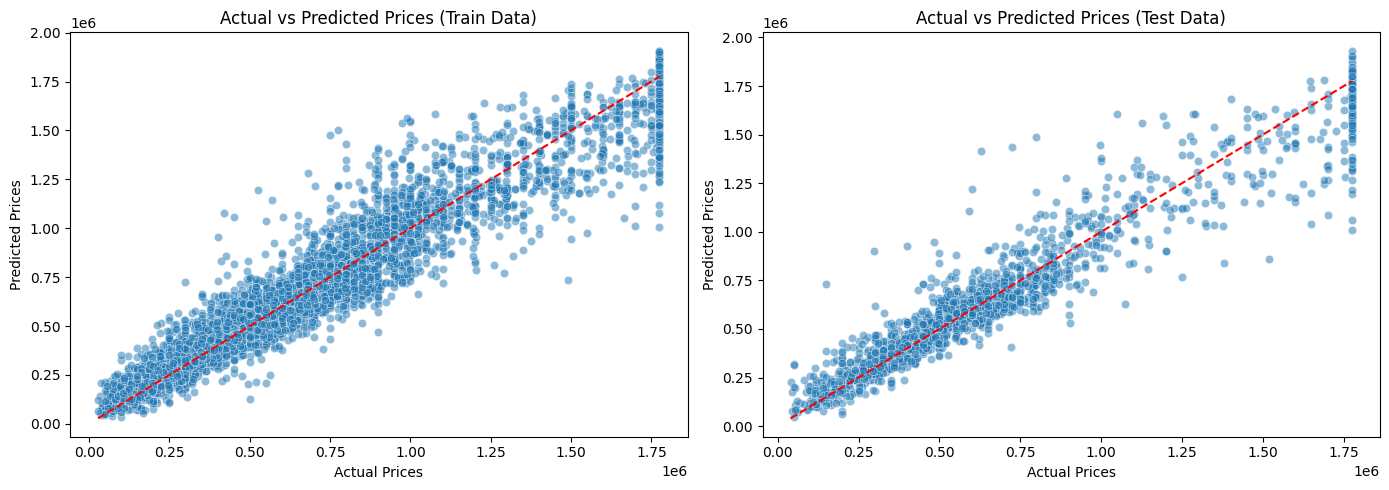

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_gb_b_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_gb_b_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout() 
plt.show()

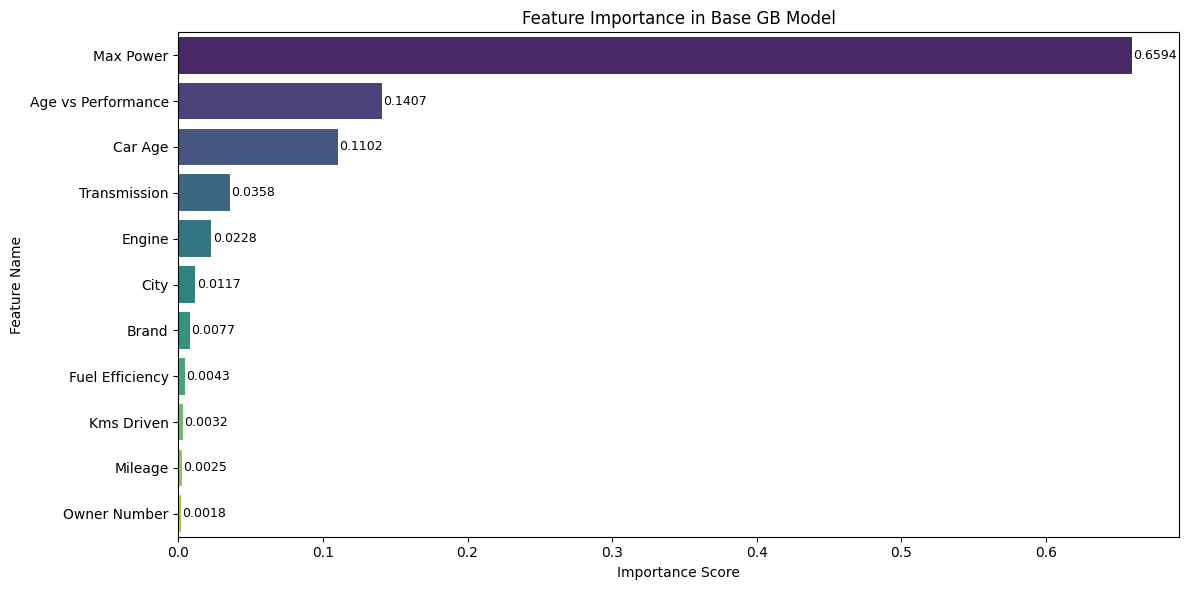

In [49]:
# Extract feature importance
feature_importance = gb_b.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance 
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.4f}', va='center', fontsize=9)

plt.title("Feature Importance in Base GB Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [50]:
# Define the model
gb_model = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model, 
    param_distributions=param_grid,
    n_iter=100,
    cv=5, 
    random_state=42,
    scoring='r2', 
    n_jobs=-1, 
    verbose=2)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
hp_gb = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05}


In [51]:
# Predticing using the model
y_train_hp_gb_pred = hp_gb.predict(X_train)
y_test_hp_gb_pred = hp_gb.predict(X_test)

print('Predictions made on X_train data\n', y_train_hp_gb_pred, '\n')
print('Predictions made on X_test data\n', y_test_hp_gb_pred)

Predictions made on X_train data
 [472024.83897009 555019.98943452 752438.24101686 ... 758834.52966006
 366670.02984819 624980.47283695] 

Predictions made on X_test data
 [416346.93022537 150275.06405052 562623.36464063 ... 510082.92917477
 196246.71094335 872562.564977  ]


In [52]:
# mse, mae & r2 score for train data
hp_gb_train_mse = mean_squared_error(y_train, y_train_hp_gb_pred)
hp_gb_train_mae = mean_absolute_error(y_train, y_train_hp_gb_pred)
hp_gb_train_r2 = r2_score(y_train, y_train_hp_gb_pred)

print('MSE:',hp_gb_train_mse)
print('MAE:',hp_gb_train_mae)
print('R2:',hp_gb_train_r2, '\n')

# mse, mae & r2 score for test data
hp_gb_test_mse = mean_squared_error(y_test, y_test_hp_gb_pred)
hp_gb_test_mae = mean_absolute_error(y_test, y_test_hp_gb_pred)
hp_gb_test_r2 = r2_score(y_test, y_test_hp_gb_pred)

print('MSE:',hp_gb_test_mse)
print('MAE:',hp_gb_test_mae)
print('R2:',hp_gb_test_r2)

MSE: 2237759768.459727
MAE: 33696.69940000538
R2: 0.990400239169901 

MSE: 12012254083.771824
MAE: 69605.67153198541
R2: 0.9535635983548677


In [53]:
hp_gb_results = pd.DataFrame(['HP Tuned GB', hp_gb_train_mse, hp_gb_train_mae, hp_gb_train_r2, hp_gb_test_mse, hp_gb_test_mae, hp_gb_test_r2]).T
hp_gb_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
hp_gb_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,HP Tuned GB,2237759768.459727,33696.6994,0.9904,12012254083.771824,69605.671532,0.953564


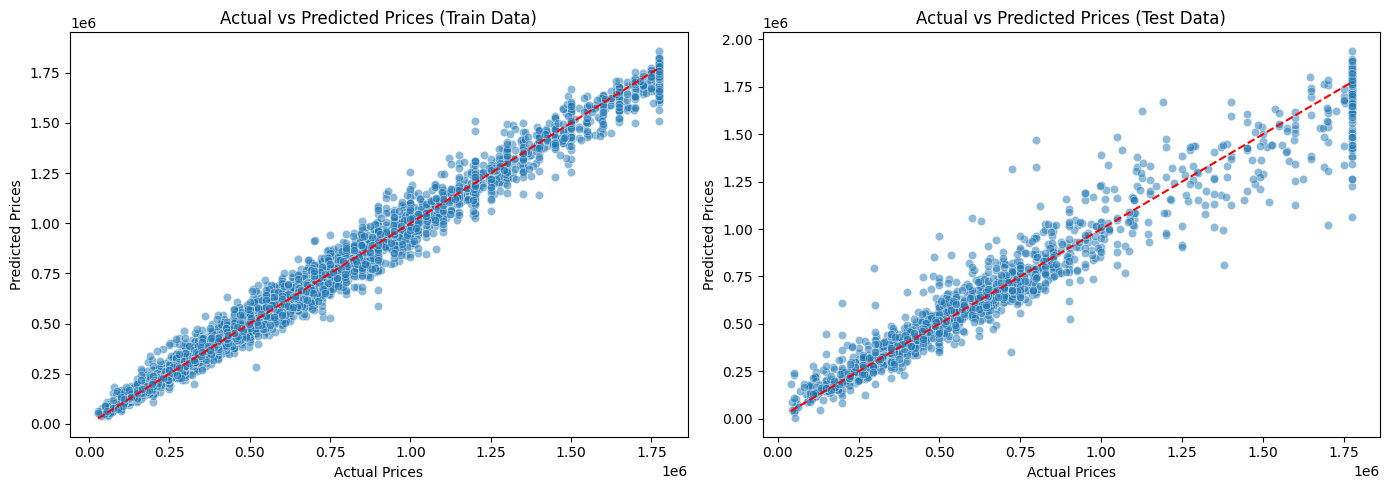

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a figure with 1 row & 2 columns

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_hp_gb_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_hp_gb_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

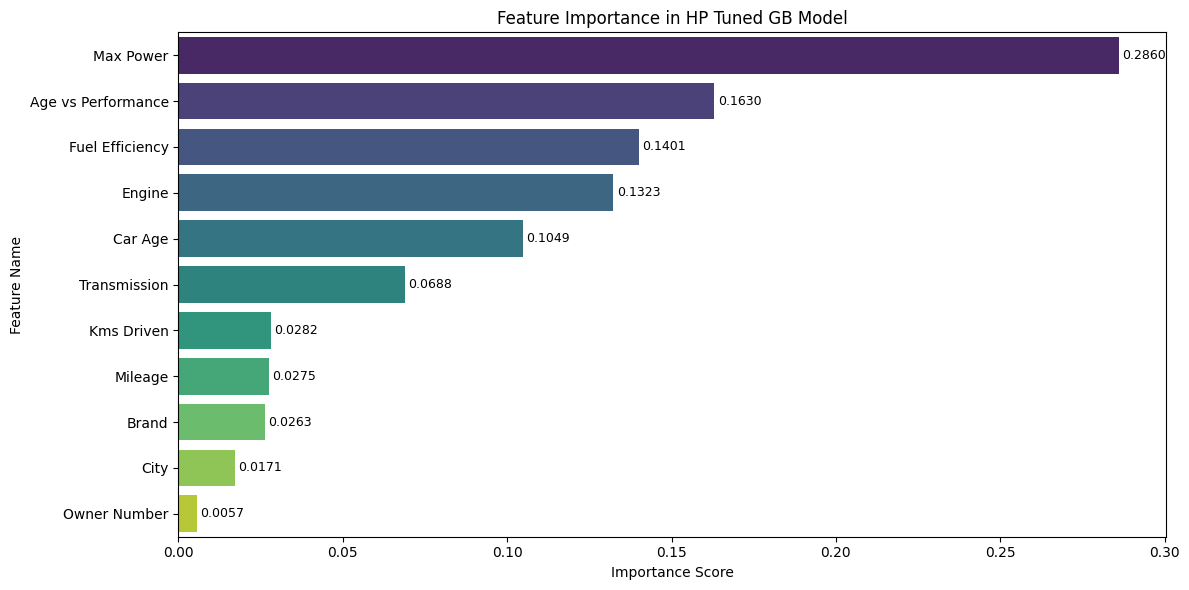

In [55]:
# Extract feature importance
feature_importance = hp_gb.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance 
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.4f}', va='center', fontsize=9)

plt.title("Feature Importance in HP Tuned GB Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [56]:
# Select only the important features to reduce overfitting
selected_features = ["Max Power", "Age vs Performance", "Engine", "Fuel Efficiency", "Car Age", "Transmission", "Kms Driven", "Brand", "Mileage"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [57]:
# Define the model
gb_model = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model, 
    param_distributions=param_grid,
    n_iter=100,
    cv=10, 
    random_state=42,
    scoring='r2', 
    n_jobs=-1, 
    verbose=2)

random_search.fit(X_train_selected, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
hp_gb2 = random_search.best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.05}


In [58]:
# Predticing using the model
y_train_hp_gb2_pred = hp_gb2.predict(X_train_selected)
y_test_hp_gb2_pred = hp_gb2.predict(X_test_selected)

print('Predictions made on X_train data\n', y_train_hp_gb2_pred, '\n')
print('Predictions made on X_test data\n', y_test_hp_gb2_pred)

Predictions made on X_train data
 [437042.20937198 443189.3240985  747934.39544798 ... 729951.01313719
 406732.45056493 690792.2219269 ] 

Predictions made on X_test data
 [389810.17697663 144236.57071699 570599.71234124 ... 447340.23776279
 217049.09078424 807272.16106539]


In [59]:
# mse, mae & r2 score for train data
hp_gb2_train_mse = mean_squared_error(y_train, y_train_hp_gb2_pred)
hp_gb2_train_mae = mean_absolute_error(y_train, y_train_hp_gb2_pred)
hp_gb2_train_r2 = r2_score(y_train, y_train_hp_gb2_pred)

print('MSE:',hp_gb2_train_mse)
print('MAE:',hp_gb2_train_mae)
print('R2:',hp_gb2_train_r2, '\n')

# mse, mae & r2 score for test data
hp_gb2_test_mse = mean_squared_error(y_test, y_test_hp_gb2_pred)
hp_gb2_test_mae = mean_absolute_error(y_test, y_test_hp_gb2_pred)
hp_gb2_test_r2 = r2_score(y_test, y_test_hp_gb2_pred)

print('MSE:',hp_gb2_test_mse)
print('MAE:',hp_gb2_test_mae)
print('R2:',hp_gb2_test_r2)

MSE: 7271563999.999718
MAE: 60808.13775291576
R2: 0.9688057331959264 

MSE: 16030020675.665295
MAE: 85514.0311897568
R2: 0.9380319069773426


In [60]:
hp_gb2_results = pd.DataFrame(['HP Tuned GB2', hp_gb2_train_mse, hp_gb2_train_mae, hp_gb2_train_r2, hp_gb2_test_mse, hp_gb2_test_mae, hp_gb2_test_r2]).T
hp_gb2_results.columns = ['Model', 'Training MSE', 'Training MAE', 'Training R2', 'Testing MSE', 'Testing MAE', 'Testing R2']
hp_gb2_results

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,HP Tuned GB2,7271563999.999718,60808.137753,0.968806,16030020675.665295,85514.03119,0.938032


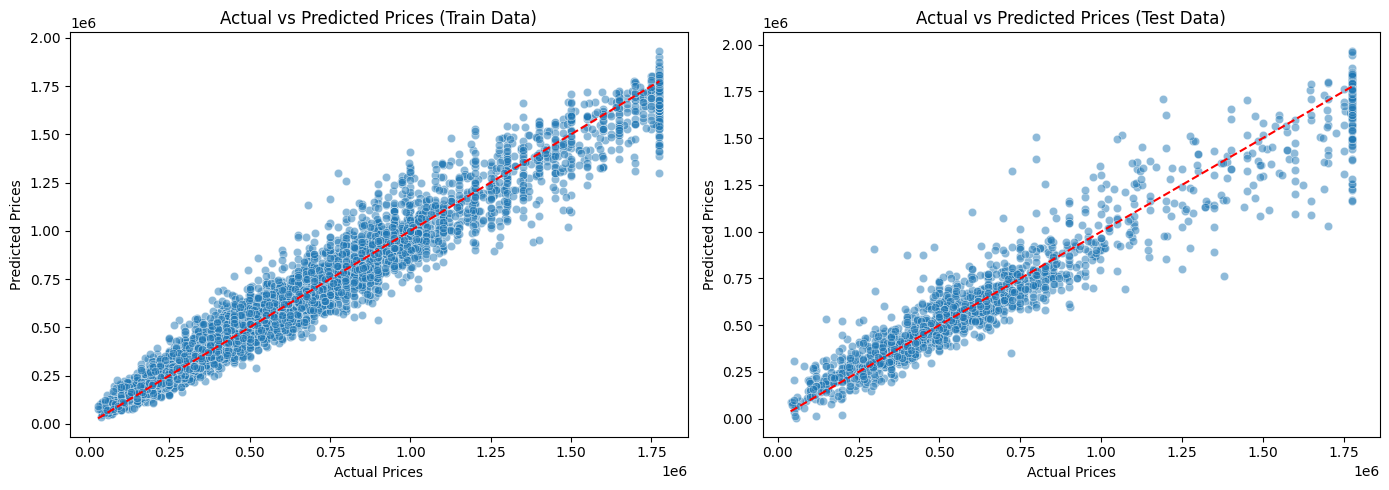

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a figure with 1 row & 2 columns

# Train Data Plot
sns.scatterplot(ax=axes[0], x=y_train, y=y_train_hp_gb2_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Reference line
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices (Train Data)")

# Test Data Plot
sns.scatterplot(ax=axes[1], x=y_test, y=y_test_hp_gb2_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title("Actual vs Predicted Prices (Test Data)")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

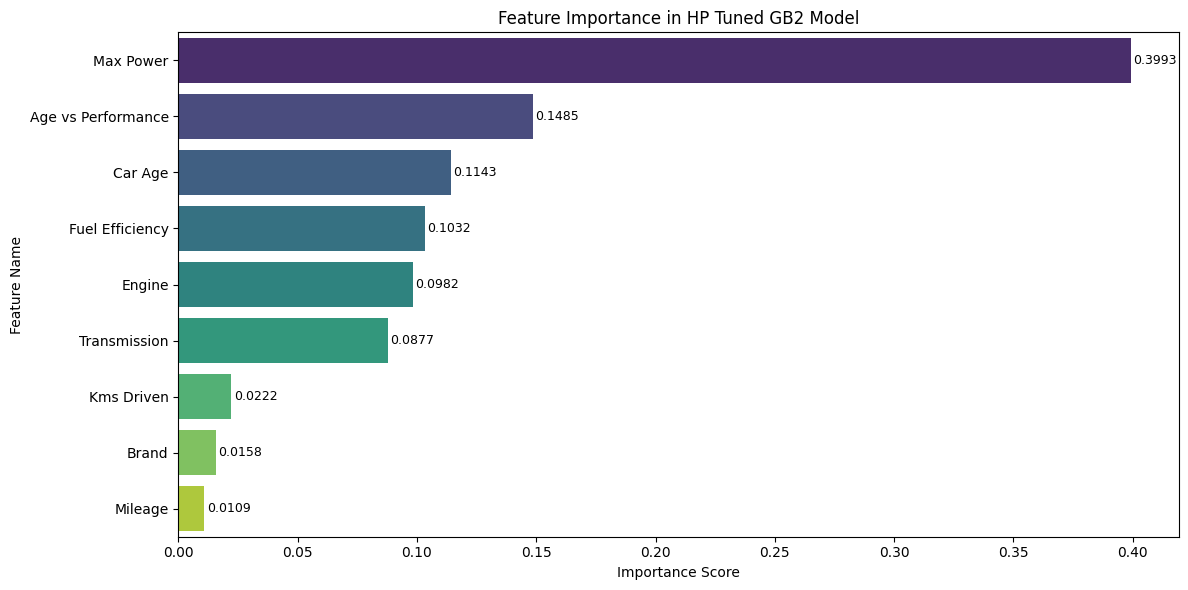

In [62]:
# Extract feature importance
feature_importance = hp_gb2.feature_importances_
features = X_train_selected.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance 
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.4f}', va='center', fontsize=9)

plt.title("Feature Importance in HP Tuned GB2 Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [63]:
comparision = pd.concat([gb_results, gb_b_results, hp_gb_results, hp_gb2_results], axis = 0).reset_index(drop=True)
comparision 

,Model,Training MSE,Training MAE,Training R2,Testing MSE,Testing MAE,Testing R2
0,Gradient Boosting,13715429743.081848,80942.468795,0.941162,17314969419.742607,87804.48457,0.933065
1,Gradient Boosting (Base),14204831430.576956,82729.200784,0.939063,17806205055.07922,88992.010165,0.931166
2,HP Tuned GB,2237759768.459727,33696.6994,0.9904,12012254083.771824,69605.671532,0.953564
3,HP Tuned GB2,7271563999.999718,60808.137753,0.968806,16030020675.665295,85514.03119,0.938032


### **📌 Model-Specific Analysis**
#### **OG Dataset**

**Gradient Boosting (Default Parameters)**

- ***Performance:***
- ***Training*** → **MSE**: 13.7 B, **MAE**: 80,942, **R²**: 0.941 
- ***Testing*** → **MSE**: 17.3 B, **MAE**: 87,804, **R²**: 0.933
- ***Inference:***
- The feature importance suggests model is biased towards dominant variables, causing high variance.
- Though generalization is decent, the error gap between training & testing shows some overfitting &  suggests room for improvement.

#### **Feature Engineering & Feature Elimination were applied**

**Gradient Boosting Base (Default Parameters)**

- ***Performance:***
- ***Training*** → **MSE**: 14.2 B, **MAE**: 82,729, **R²**: 0.939
- ***Testing*** → **MSE**: 17.8 B, **MAE**: 88,992, **R²**: 0.931 
- ***Inferencee:***
- Feature engineering did not significantly improve generalization. MSE & MAE slightly increased, but R² is slightly lower
- Still, the error gap remains significant, suggesting that default hyperparameters are not sufficient.

#### **Feature Engineering, Feature Elimination, & Hyperparameter Tuning were applied**

**HP Tuned Gradient Boosting**

- ***Performance:***
- ***Training*** → **MSE**: 2.23 B, **MAE**: 33,696, **R²**: 0.990
- ***Testing*** → **MSE**: 12.01 B, **MAE**: 69,605, **R²**: 0.953 
- ***Inference:***
- Hyperparameter tuning significant improved generalization! Testing R² increased to 0.953, while MAE reduced to 69,605
- More balanced contribution across features than before as few features gained importance.
- Possible slight overfitting, as Training R² is much higher than Testing R².
  
#### **Futher Feature Elimination, & Hyperparameter Tuning were applied**

**HP Tuned Gradient Boosting 2**

- ***Performance:***
- ***Training*** → **MSE**: 7.27 B, **MAE**: 60,808, **R²**: 0.968
- ***Testing*** → **MSE**: 16.03 B, **MAE**: 85,514, **R²**: 0.938
- ***Inference:***
- Feature elimination dropped Training R² to 0.968, which suggests the model has reduced overfitting, Testing R² slightly decreased to 0.938 but is still strong.
- MSE & MAE worsened on testing data, indicating that some important features may have been removed, performance dropped slightly
- Reduced complexity & overfitting at the cost of accuracy

#### ***HP Tuned Gradient Boosting is the best tradeoff between Accuracy & Generalization, though slightly Overfit.***

In [67]:
save_dir = "saved_pickles"
os.makedirs(save_dir, exist_ok=True)

# Save the trained model as a pickle file
final_model = hp_gb
model_path = os.path.join(save_dir, "final_model.pkl")

with open(model_path, "wb") as file:
    pickle.dump(final_model, file)
print(f"Model saved successfully at: {model_path}")

Model saved successfully at: saved_pickles\final_model.pkl


In [68]:
# Save all encoders as a dictionary
encoders_path = os.path.join(save_dir, "label_encoders.pkl")

with open(encoders_path, "wb") as le_file:
    pickle.dump(label_encoders, le_file)
print(f"Label Encoders saved successfully at: {encoders_path}")

Label Encoders saved successfully at: saved_pickles\label_encoders.pkl


In [69]:
# Save MinMaxScaler
scaler_path = os.path.join(save_dir, "mm_scaler.pkl")

with open(scaler_path, "wb") as mm_s_file:
    pickle.dump(mm_scaler, mm_s_file)
print(f"MinMaxScaler saved successfully at: {scaler_path}")

MinMaxScaler saved successfully at: saved_pickles\mm_scaler.pkl
